In [5]:
# Save topology with carbon alphas 
#joined_traj=md.load("/net/jam-amaro-shared/bccgc4/CatSMD/md1/1.nc", top="/net/jam-amaro-shared/bccgc4/Strided_Traj/system.prmtop",stride=100)
#selection=joined_traj.topology.select("protein")
#joined_traj=joined_traj.atom_slice(selection)
    
#first_frame=joined_traj[0]
#first_frame.save_hdf5("/net/jam-amaro-shared/bccgc4/Strided_Traj/CA_Aligned_Traj/protein.h5")

In [ ]:
#Start 

In [1]:
import pyemma
import glob
import numpy as np
import pyemma.plots as mplt
%pylab inline
import mdtraj as md
import pyemma.coordinates as coor
 
def average_by_state(dtraj, x, nstates):
    assert(len(dtraj) == len(x))
    N = len(dtraj)
    res = np.zeros((nstates))
    for i in range(nstates):
        I = np.argwhere(dtraj == i)[:,0]
        res[i] = np.mean(x[I])
    return res
 
def avg_by_set(x, sets):
    # compute mean positions of sets. This is important because of some technical points the set order
    # in the coarse-grained TPT object can be different from the input order.
    avg = np.zeros(len(sets))
    for i in range(len(sets)):
        I = list(sets[i])
        avg[i] = np.mean(x[I])
    return avg


/opt/anaconda3/lib/python3.6/site-packages/pyemma/__init__.py:130: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.6, you have 2.5.4.
  .format(latest=latest, current=current), category=UserWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
traj=md.load("/net/jam-amaro-shared/bccgc4/Strided_Traj/traj_noh_stride100.nc",top="/net/jam-amaro-shared/bccgc4/PCA/protein_noh_top.h5")

In [5]:
Traj = md.load("/net/jam-amaro-shared/bccgc4/Strided_Traj/traj_stride100.nc", top="/net/jam-amaro-shared/bccgc4/Strided_Traj/protein.h5")

In [6]:
print(traj)
print(Traj)

<mdtraj.Trajectory with 4500 frames, 3107 atoms, 220 residues, and unitcells>
<mdtraj.Trajectory with 4500 frames, 3324 atoms, 220 residues, and unitcells>


In [7]:
trajfile="/net/jam-amaro-shared/bccgc4/Strided_Traj/traj_noh_stride100.nc"
topfile="/net/jam-amaro-shared/bccgc4/PCA/protein_noh_top.h5"

feat = coor.featurizer(topfile)
feat.add_all()
print(feat.describe()[:13])
inp = coor.source(trajfile, feat)
print(inp)
print('trajectory length = ',inp.trajectory_length(0))
print('number of dimension = ',inp.dimension())

['ATOM:ACE 0 CH3 0 x', 'ATOM:ACE 0 CH3 0 y', 'ATOM:ACE 0 CH3 0 z', 'ATOM:ACE 0 C 1 x', 'ATOM:ACE 0 C 1 y', 'ATOM:ACE 0 C 1 z', 'ATOM:ACE 0 O 2 x', 'ATOM:ACE 0 O 2 y', 'ATOM:ACE 0 O 2 z', 'ATOM:ILE 1 N 3 x', 'ATOM:ILE 1 N 3 y', 'ATOM:ILE 1 N 3 z', 'ATOM:ILE 1 CA 4 x']
trajectory length =  4500
number of dimension =  9321


Text(0, 0.5, 'principal comp. 2')

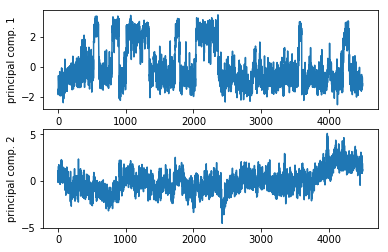

In [8]:
pca_obj=coor.pca(inp, dim= -1, var_cutoff=0.95) #0.95--> 220 dimensions
Ypca = pca_obj.get_output()[0]

subplot2grid((2,1),(0,0))
plot(Ypca[:,0])
ylabel('principal comp. 1')
subplot2grid((2,1),(1,0))
plot(Ypca[:,1])
ylabel('principal comp. 2')

In [9]:
cl = coor.cluster_kmeans(data=Ypca,k=10,max_iter=5000)

dtrajs = cl.dtrajs
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]
 
print(dtrajs)
print(np.size(dtrajs))

[array([2, 2, 2, ..., 8, 8, 8], dtype=int32)]
4500


[ 2.2123988  -0.5625385  -1.0760943  -0.6982353   2.4106562  -0.5202556
 -1.0822605  -0.4480963  -0.51540506  2.1581526 ]
[-0.44575787 -0.32383233  0.45359382 -0.19288795 -1.0103463   2.5585225
 -2.0900397  -0.9201957   1.6952683   0.37882382]


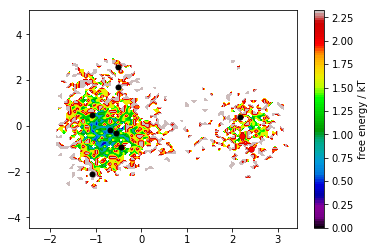

In [11]:
mplt.plot_free_energy(np.vstack(Ypca)[:,0], np.vstack(Ypca)[:,1])
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]
plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='black')

print(cc_x)
print(cc_y)

plot(cc_x[4], cc_y[4],linewidth=0, marker='o', markersize=5, color="red")
plot(cc_x[0], cc_y[0],linewidth=0, marker='o', markersize=5, color="red")

savefig('PCA_free_energy.png')

In [12]:
print(np.size(pca_obj.cumvar))
print(pca_obj.cumvar)
print(np.size(Ypca[0]))

9321
[0.03766306 0.06846286 0.09569396 ... 1.         1.         1.        ]
871


In [13]:
print(dtrajs)
dtraj=max(dtrajs)
print(dtraj)
print(max(dtraj))

[array([2, 2, 2, ..., 8, 8, 8], dtype=int32)]
[2 2 2 ... 8 8 8]
9


In [ ]:
#From here on it's clustering and extracting centroids, as well as saving out the centroid coords

In [14]:
Clusters={}

for count in range(0,10):
    frames=[]
    indices = [d for d, x in enumerate(dtraj) if x == count]
    frames.append(indices)
    Clusters[count]=frames


In [15]:
% store Clusters

UsageError: Line magic function `%` not found.


In [17]:
for key in Clusters:
    print(key)
    a=Traj[Clusters[key]]

    a.save_xtc('/net/jam-amaro-shared/bccgc4/PCA/Trajectories/Traj_0.95-'+str(key)+".xtc")
    print(a)

0
<mdtraj.Trajectory with 303 frames, 3324 atoms, 220 residues, and unitcells>
1
<mdtraj.Trajectory with 1053 frames, 3324 atoms, 220 residues, and unitcells>
2
<mdtraj.Trajectory with 559 frames, 3324 atoms, 220 residues, and unitcells>
3
<mdtraj.Trajectory with 542 frames, 3324 atoms, 220 residues, and unitcells>
4
<mdtraj.Trajectory with 202 frames, 3324 atoms, 220 residues, and unitcells>
5
<mdtraj.Trajectory with 221 frames, 3324 atoms, 220 residues, and unitcells>
6
<mdtraj.Trajectory with 145 frames, 3324 atoms, 220 residues, and unitcells>
7
<mdtraj.Trajectory with 588 frames, 3324 atoms, 220 residues, and unitcells>
8
<mdtraj.Trajectory with 359 frames, 3324 atoms, 220 residues, and unitcells>
9
<mdtraj.Trajectory with 528 frames, 3324 atoms, 220 residues, and unitcells>


In [18]:
avg = [100, 100, 100, 100, 100,100, 100, 100, 100, 100]
indices = np.zeros(10)
for i in range(len(Ypca)):
    c = cl.clustercenters[cl.dtrajs[0][i]]

    
    v = Ypca[i]
    
    newavg = np.linalg.norm(c-v)
   
    if avg[cl.dtrajs[0][i]] > newavg:
        avg[cl.dtrajs[0][i]] = newavg
        indices[cl.dtrajs[0][i]] = i
        
print(avg)
print(indices)

for i in range(len(avg)):
    Traj[i].save_pdb('/net/jam-amaro-shared/bccgc4/PCA/centroids/CENTROID_0.95-%s.pdb' % i)

[5.5112553, 5.422754, 5.4280324, 5.589189, 5.678764, 5.517187, 5.8907475, 5.5552607, 5.454012, 5.4188166]
[2233. 1468. 1810. 3548.  874. 4211. 2441.  151. 4477. 1274.]
